Random Forest Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       291
           1       0.94      0.89      0.92       309

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

Confusion Matrix:
 [[274  17]
 [ 33 276]]
ROC AUC Score:
 0.9173923197544457
XGBoost Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       291
           1       0.94      0.93      0.93       309

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600

Confusion Matrix:
 [[273  18]
 [ 23 286]]
ROC AUC Score:
 0.9318553364694891
Neural Network Model Evaluation:
Classification Report:
               precision    re

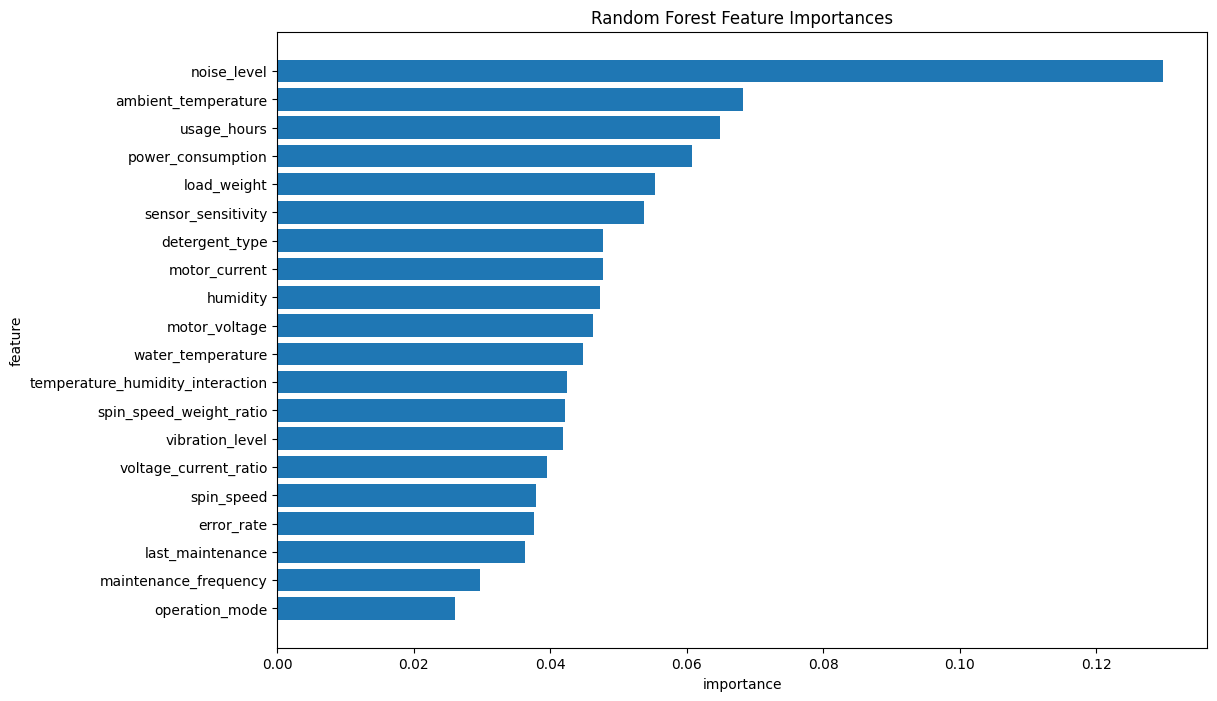

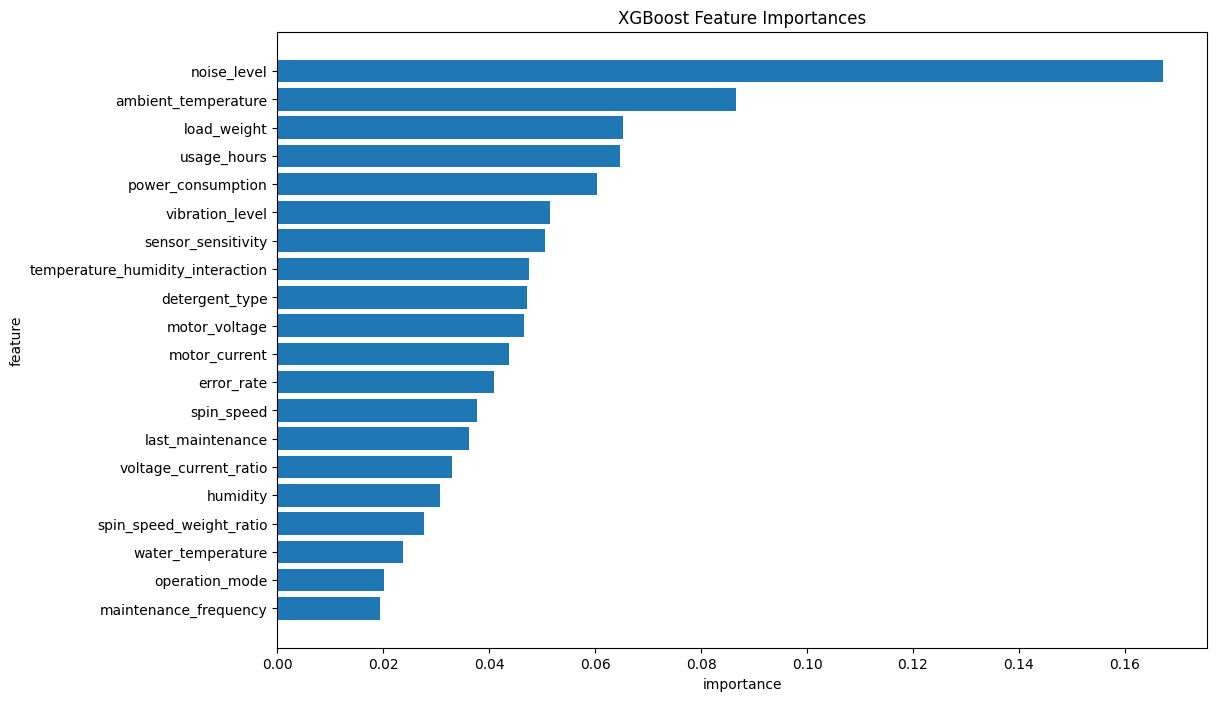

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic data
def generate_synthetic_data():
    X, y = make_classification(n_samples=3000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
    feature_names = [
        'motor_current', 'motor_voltage', 'spin_speed', 'vibration_level', 'load_weight', 'detergent_type',
        'water_temperature', 'ambient_temperature', 'humidity', 'usage_hours', 'last_maintenance', 
        'maintenance_frequency', 'temperature_humidity_interaction', 'voltage_current_ratio', 'spin_speed_weight_ratio',
        'power_consumption', 'noise_level', 'operation_mode', 'error_rate', 'sensor_sensitivity'
    ]
    X = pd.DataFrame(X, columns=feature_names)
    return X, y

# Create Keras model
def create_keras_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(20,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Generate data
X, y = generate_synthetic_data()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
keras_model = KerasClassifier(build_fn=create_keras_model, epochs=50, batch_size=32, verbose=0)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
keras_model.fit(X_train, y_train)

# Ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('nn', keras_model)
], voting='soft')

# Train ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred))

print("Random Forest Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

print("XGBoost Model Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

print("Neural Network Model Evaluation:")
evaluate_model(keras_model, X_test, y_test)

print("Ensemble Model Evaluation:")
evaluate_model(ensemble_model, X_test, y_test)

# Feature importance for Random Forest
rf_importances = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['feature'], rf_feature_importance_df['importance'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Feature importance for XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_importances})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(xgb_feature_importance_df['feature'], xgb_feature_importance_df['importance'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()